<a href="https://colab.research.google.com/github/nina-prog/DataAnalysis_VAE/blob/main/Visualize_ECG5000_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize data set ECG5000 V1.0
---
See [Visualize_ECG5000 V2.0 here](https://github.com/nina-prog/DataAnalysis_VAE/blob/main/Visualize_ECG5000_V2_0.ipynb)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()


In [5]:
# Read data
df = pd.read_fwf('ECG5000_TRAIN.txt')
df.to_csv('ecg5000.csv')
# Flatten data to one dimensional array
time_series = df.to_numpy().flatten()
# Transform to list
y = list(time_series)

# Information about our time series
print("y is of type: {}".format(type(y)))
print("y has length of: {}".format(len(y)))


y is of type: <class 'list'>
y has length of: 70359


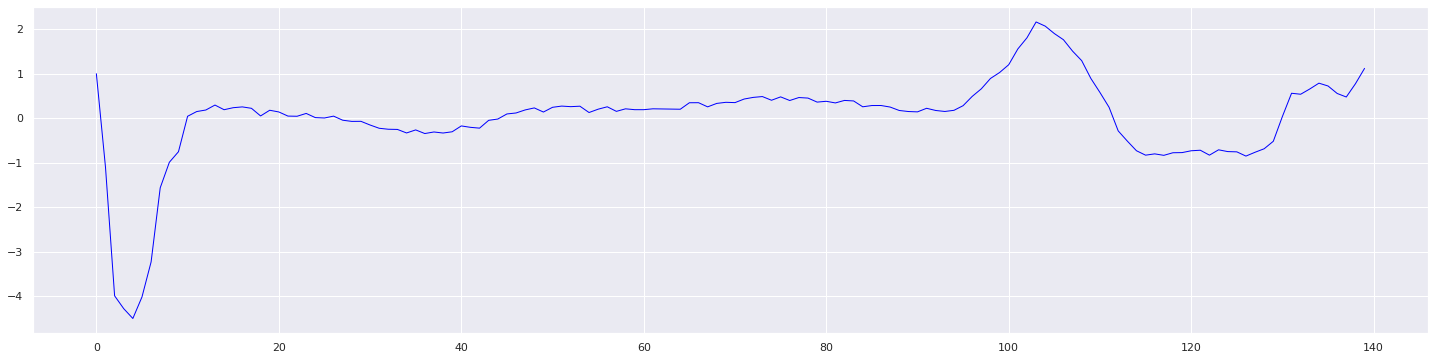

In [38]:
# Select first 140 entries of y to plot them
sample = y[0:140]

# Set figure size
plt.figure(figsize=(25,6))
plt.plot(sample, linewidth = 1, color="blue")

# for saving the plot on locale drive
# plt.savefig("ecg5000.png", format='png', dpi=150)

In [39]:
# lstm autoencoder recreate sequence
# Source: https://machinelearningmastery.com/lstm-autoencoders/
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
sequence = np.array(sample)
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)
# plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
# demonstrate recreation
yhat = model.predict(sequence, verbose=0)
print(yhat[0,:,0])

[-0.05393058 -0.07991032 -0.09666657 -0.10574639 -0.1086477  -0.10672924
 -0.10126124 -0.09335393 -0.08389862 -0.07358977 -0.06305144 -0.05289491
 -0.04337925 -0.0345729  -0.02648173 -0.01909253 -0.01237802 -0.00630681
 -0.00081536  0.00413794  0.00859531  0.01260038  0.01619629  0.01942419
  0.0223225   0.02492643  0.02726789  0.02937549  0.03127475  0.03298828
  0.03453613  0.03593595  0.03720333  0.03835207  0.0393943   0.0403408
  0.04120109  0.04198363  0.04269595  0.04334478  0.04393612  0.04447536
  0.04496723  0.04541618  0.04582604  0.04620036  0.04654231  0.04685478
  0.04714038  0.04740145  0.0476402   0.04785851  0.04805817  0.04824079
  0.04840789  0.04856077  0.04870062  0.04882864  0.04894577  0.04905298
  0.04915109  0.04924092  0.04932311  0.04939839  0.0494673   0.04953036
  0.04958811  0.04964097  0.04968938  0.04973368  0.04977427  0.04981142
  0.04984546  0.0498766   0.04990514  0.04993124  0.04995516  0.04997706
  0.04999711  0.05001552  0.0500323   0.05004773  0.

       Sample      yhat
0    1.000000 -0.053931
1   -1.100878 -0.079910
2   -3.996840 -0.096667
3   -4.285843 -0.105746
4   -4.506579 -0.108648
..        ...       ...
135  0.724046  0.050214
136  0.555784  0.050214
137  0.476333  0.050214
138  0.773820  0.050214
139  1.119621  0.050214

[140 rows x 2 columns]


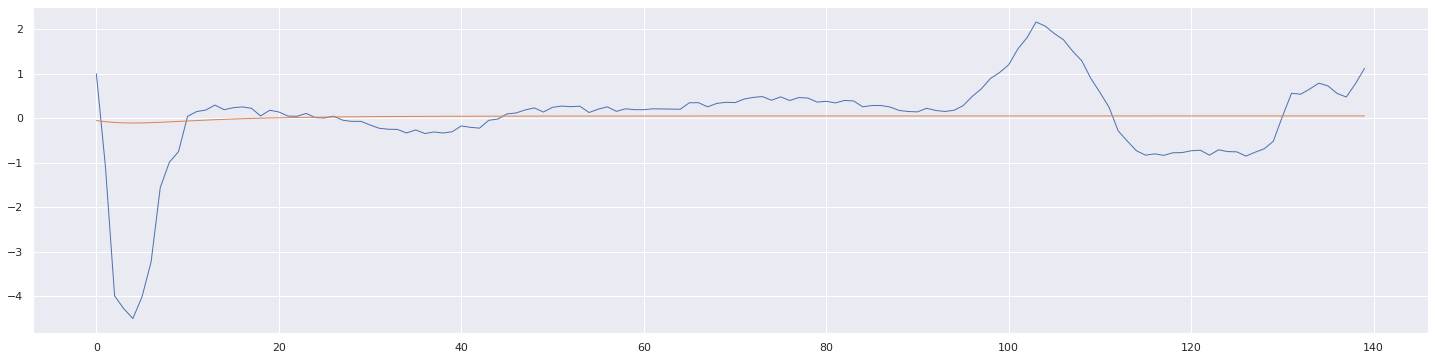

In [40]:
dic = {"Sample": sample, "yhat": yhat.flatten()}
val = pd.DataFrame(data=dic)
print(val)

plt.figure(figsize=(25,6))
plt.plot(val, linewidth = 1)
